# The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of [ Boston MA](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). The following describes the dataset columns:

* CRIM - per capita crime rate by town


* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
This tells us how much of the land is set aside for big houses. Bigger lots mean more space between homes.

* INDUS - proportion of non-retail business acres per town.
This shows how much of the area is used for industries and businesses instead of homes or parks.

* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

* NOX - nitric oxides concentration (parts per 10 million)
This is about air quality. It measures how much pollution from vehicles or factories is in the air.

* RM - average number of rooms per dwelling
This is the average number of rooms in houses. More rooms usually mean bigger houses

* AGE - proportion of owner-occupied units built prior to 1940
This tells us how old the houses are. A higher number means most homes in the neighborhood are older.

* DIS - weighted distances to five Boston employment centres
Imagine how far people in the neighborhood have to travel to get to major job centers. A smaller number means it’s closer to work.

* RAD - index of accessibility to radial highways
This is about how easily people can get on highways. A higher number means the neighborhood is well-connected by roads.

* TAX - full-value property-tax rate per \$10,000

* PTRATIO - pupil-teacher ratio by town
 This shows how crowded schools are. A lower number means fewer students per teacher, which is usually better for education.

* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
This is a mathematical way of looking at the proportion of Black residents in the neighborhood.

* LSTAT - % lower status of the population
This tells us the percentage of people in the neighborhood who might be struggling financially.

* MEDV - Median value of owner-occupied homes in \$1000's
This is the main point we’re trying to understand—it’s the median (middle) value of houses in a neighborhood, in thousands of dollars. For example, if this is 30, it means the median house price is $30,000.



In [4]:
import numpy as np
import pandas as pd
import os


from pandas import read_csv
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [5]:
# Dimension of the dataset
print(np.shape(data))

(506, 14)


In [6]:
# Let's summarize the data to see the distribution of data
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

The maximum value of MEDV in the dataset is 50.00.

this value is not a natural maximum but rather a limit or cap set by the dataset creators. This is called censoring.

 if a neighborhood’s median home price was higher than $50,000, it was still recorded as 50.00.


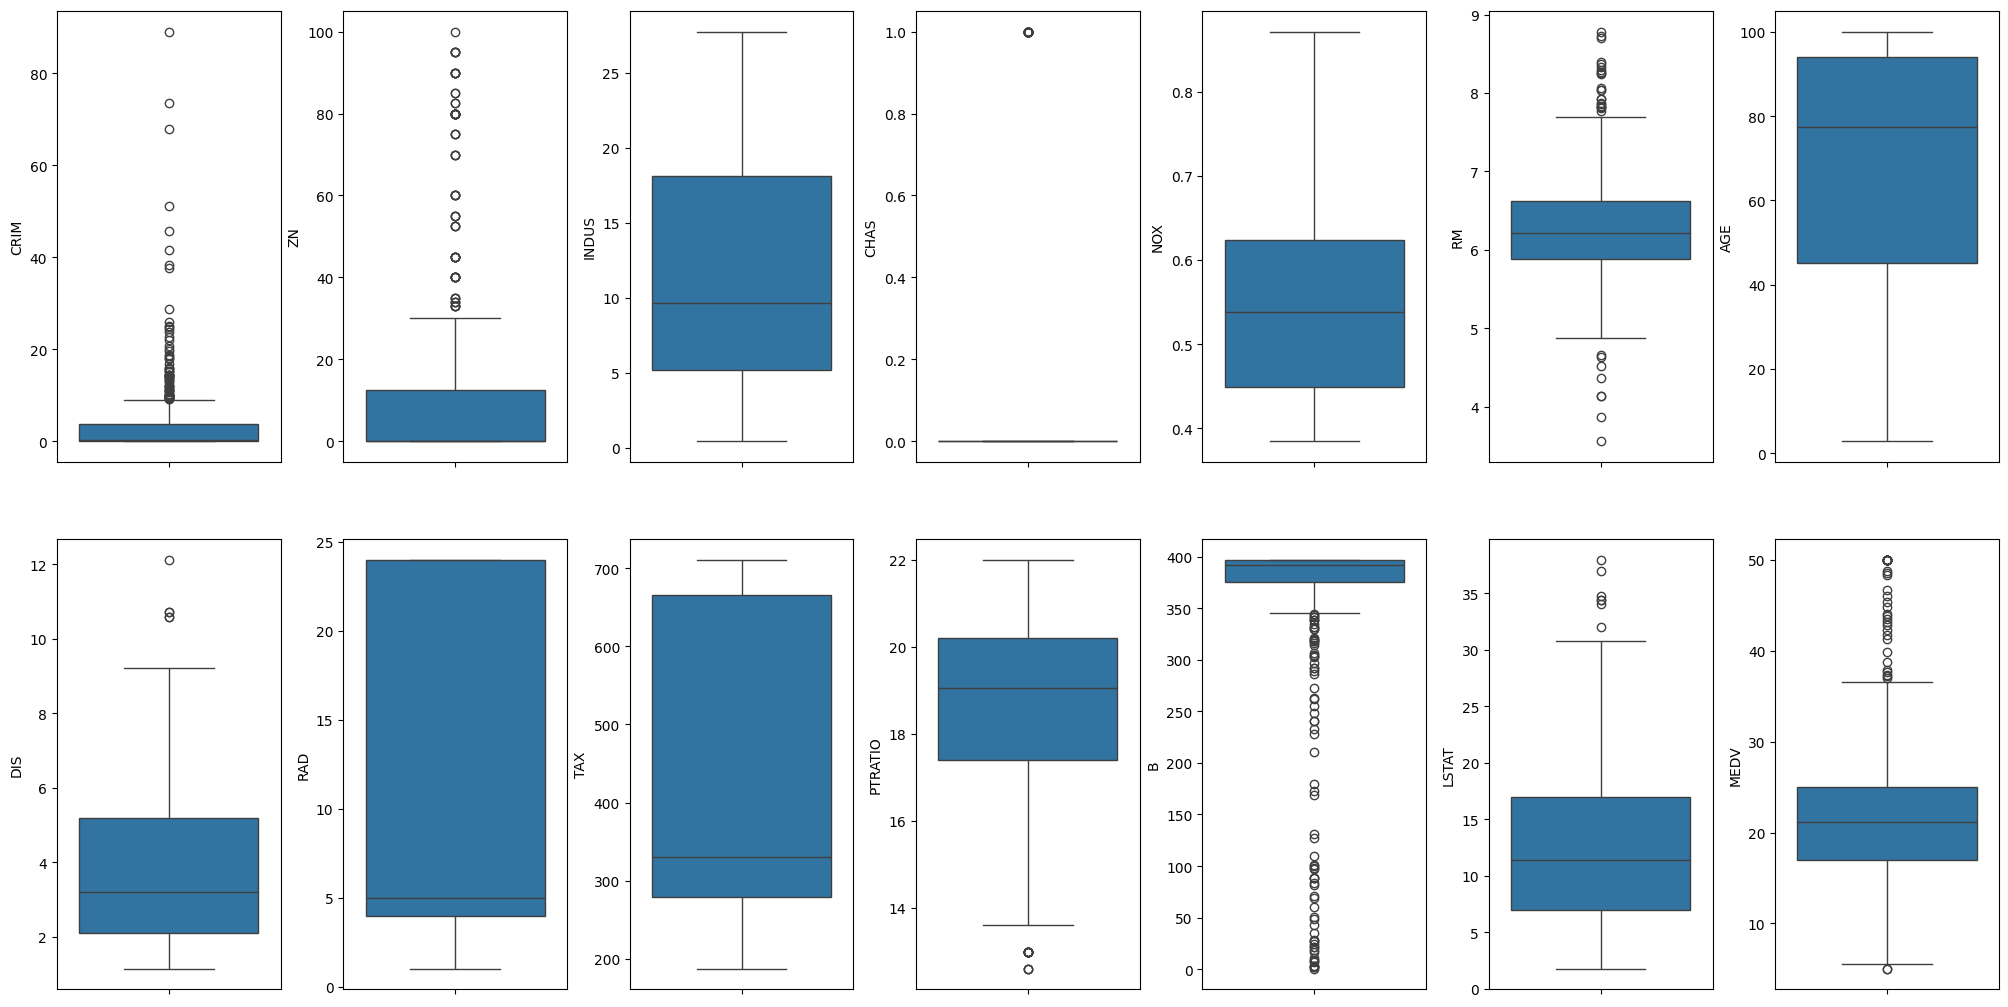

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():#Iterates over the items in the data dictionary (k) is the name of variable (v) is the value of it
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.

In [11]:
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))



Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


Let's remove MEDV outliers (MEDV = 50.0) before plotting more distributions

In [12]:
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(490, 14)


C:\Users\proah\AppData\Local\Temp\ipykernel_10748\2662893558.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\proah\AppData\Local\Temp\ipykernel_10748\2662893558.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\proah\AppData\Local\Temp\

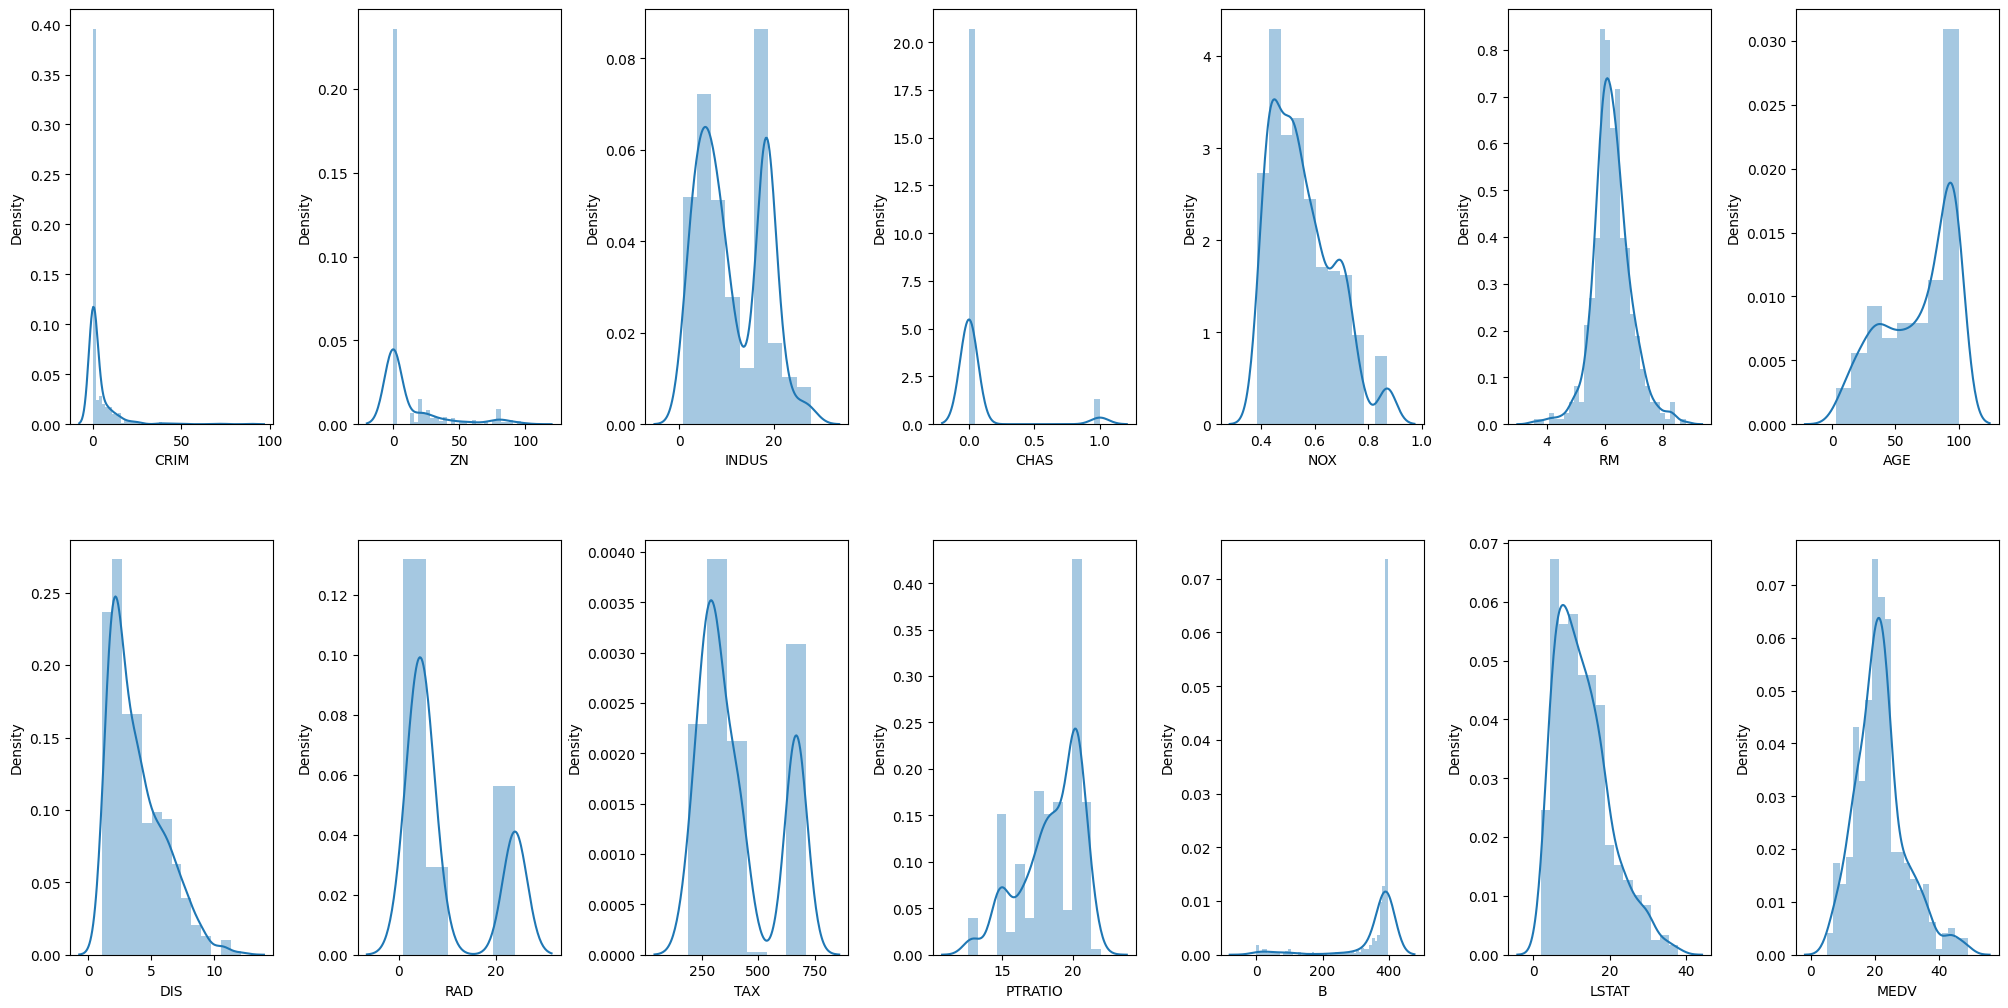

In [13]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).

Now let's plot the pairwise correlation on data.

<Axes: >

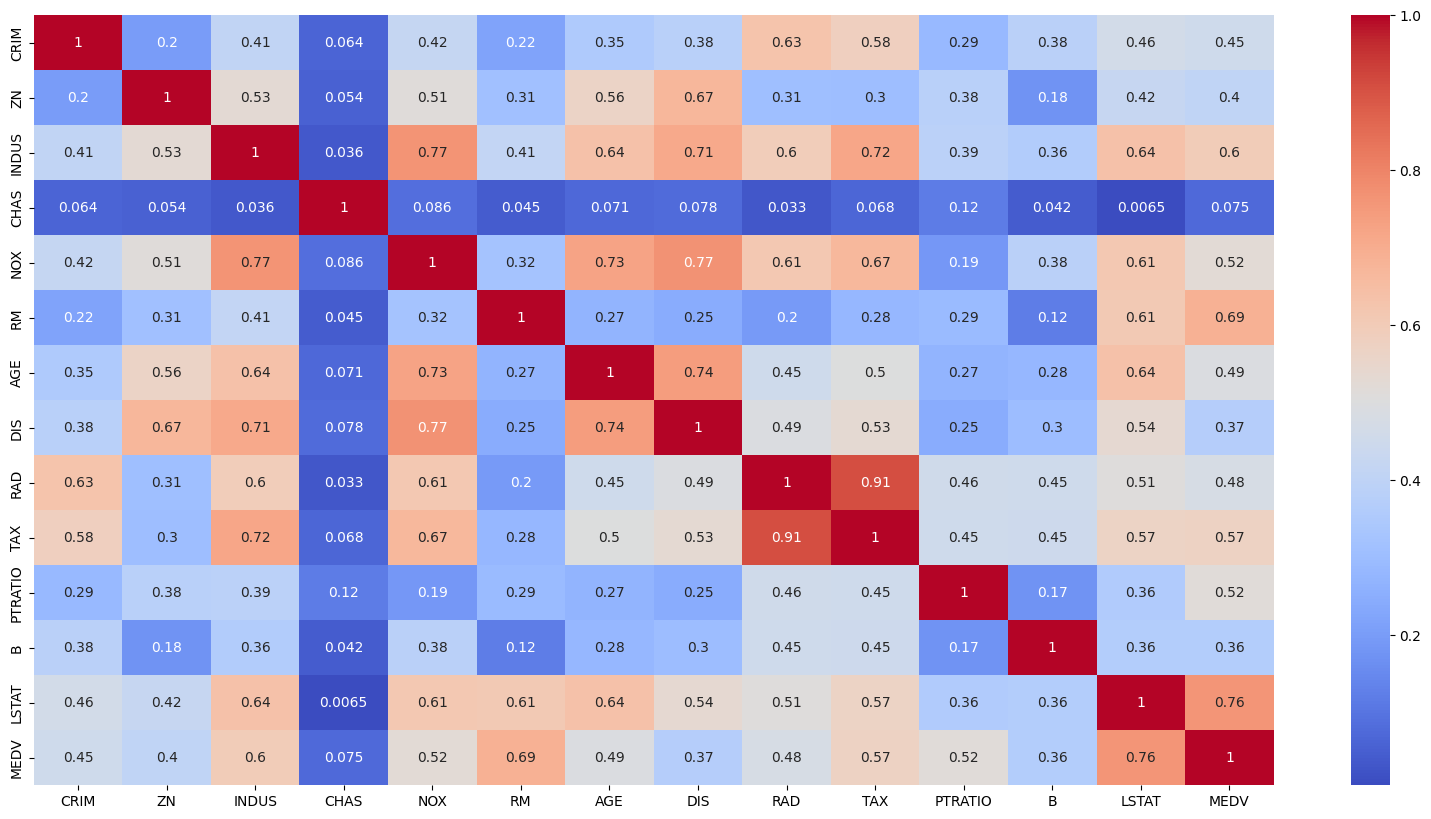

In [14]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True, cmap='coolwarm')

TAX and RAD are highly correlated features.
LSTAT, INDUS, RM, TAX, NOX, PTRAIO ----> correlation score above 0.5 with MEDV which is a good indication of using as predictors.

plot the columns against MEDV.

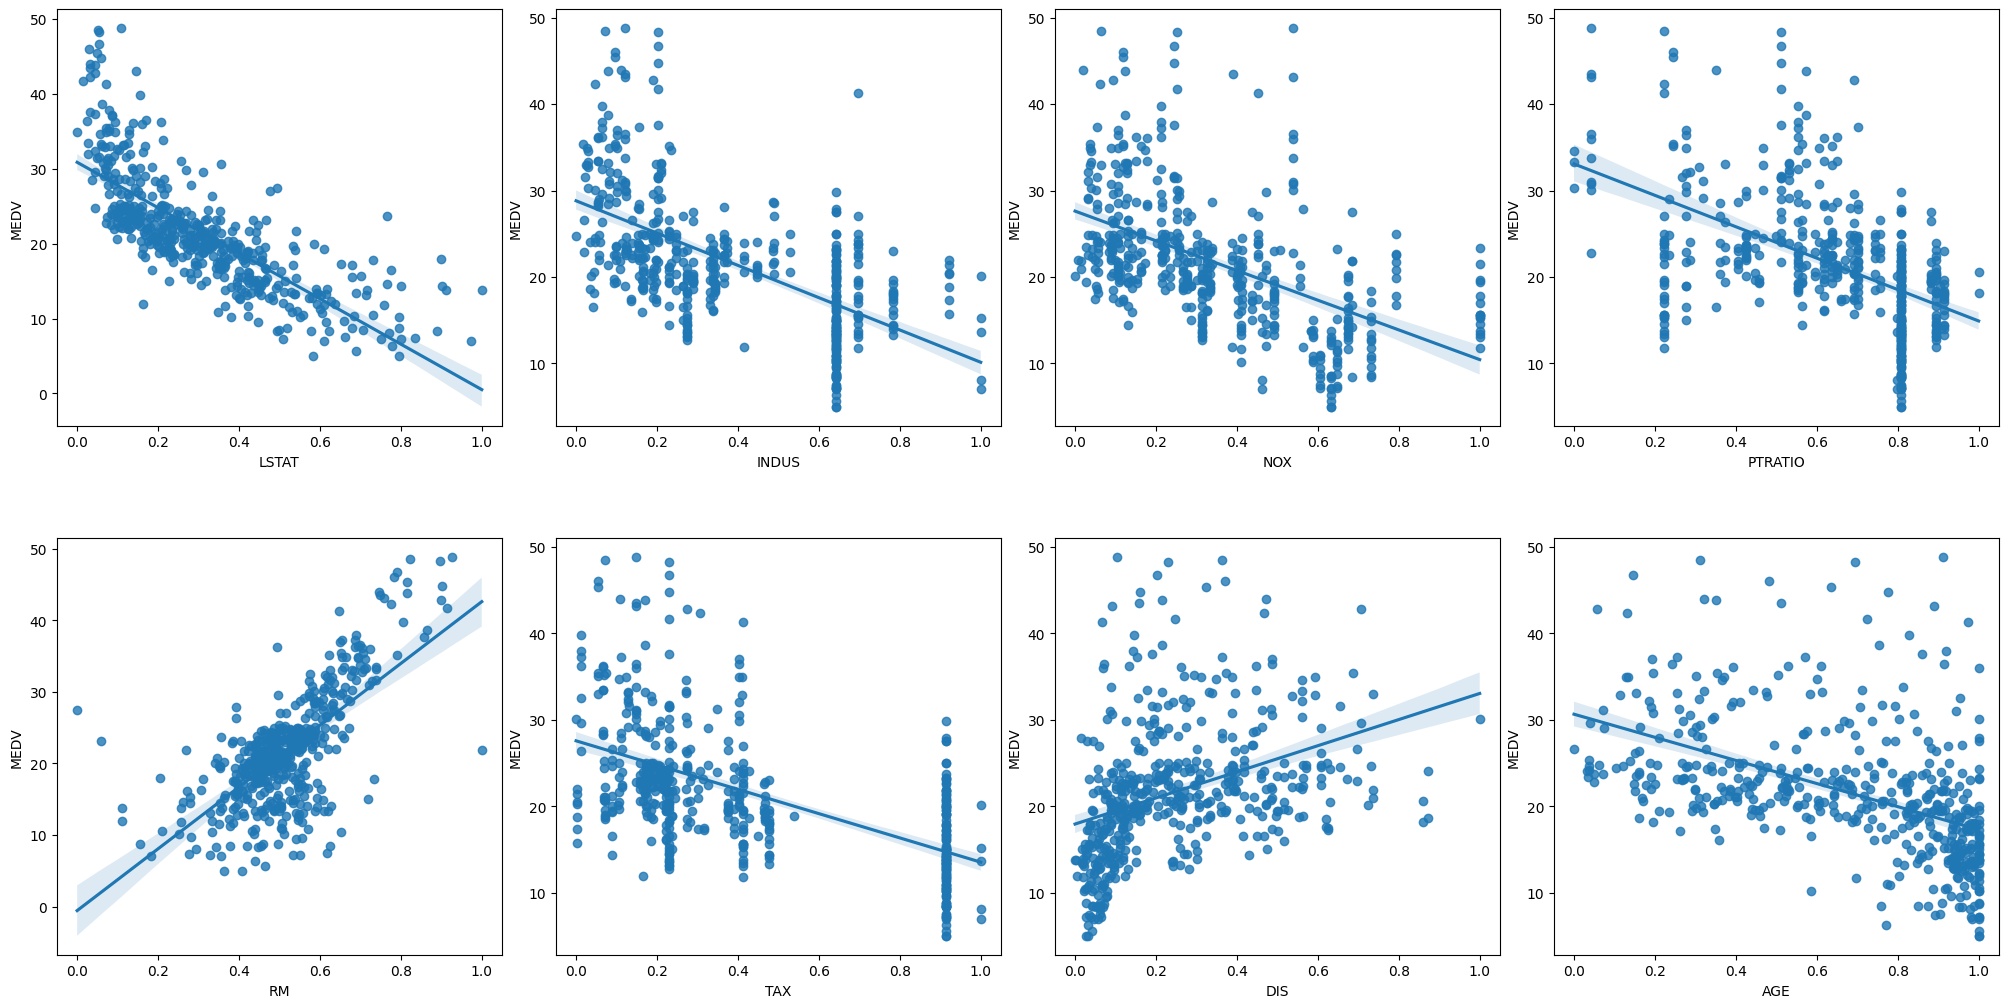

In [15]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [17]:
# Log Transformation to reduce skewness
X = x.apply(lambda x: np.log1p(x))  # Apply log(1+x) to handle zeros and reduce skewness
y = np.log1p(y)

In [18]:
# Remove multicollinearity: Drop "TAX" since "RAD" and "TAX" are highly correlated
X = X.drop(columns=['TAX'])

In [19]:
data.to_excel("housing_cleaned.xlsx", index=False)


In [25]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.preprocessing import StandardScaler
# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# Initialize results storage
results = {}


### Linear Regression ###
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
results['Linear Regression'] = mse_lr

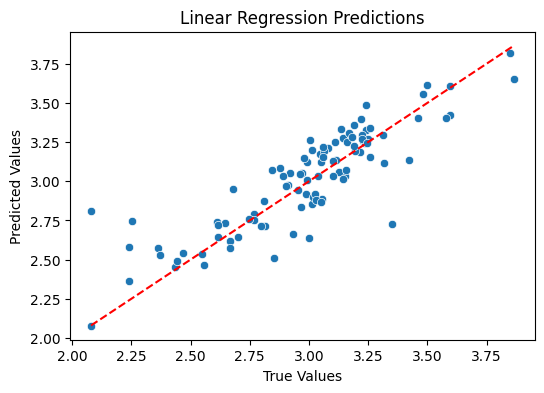

In [29]:

# Plot predictions
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Predictions")
plt.show()

In [30]:
### Ridge Regression ###
ridge = Ridge(alpha=1.0)  # L2 regularization
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
results['Ridge Regression'] = mse_ridge

In [31]:
### Lasso Regression ###
lasso = Lasso(alpha=0.1)  # L1 regularization
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
results['Lasso Regression'] = mse_lasso

In [32]:
### Polynomial Regression (degree=3) ###
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_lr = LinearRegression()
poly_lr.fit(X_poly_train, y_train)
y_pred_poly = poly_lr.predict(X_poly_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
results['Polynomial Regression (degree=3)'] = mse_poly

In [33]:
### Support Vector Regression (SVR with RBF kernel) ###
svr = SVR(kernel='rbf', C=100, gamma=0.1)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
results['SVR (RBF Kernel)'] = mse_svr


In [34]:
### Decision Tree Regressor ###
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
results['Decision Tree Regressor'] = mse_dt

In [35]:
### KNeighbors Regressor ###
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
results['KNeighbors Regressor'] = mse_knn

In [36]:
# Display results
results_df = pd.DataFrame.from_dict(results, orient='index' columns=['MSE']).sort_values(by='MSE')
print(results_df)

                                          MSE
KNeighbors Regressor                 0.024252
Ridge Regression                     0.030029
Decision Tree Regressor              0.030042
Linear Regression                    0.030216
SVR (RBF Kernel)                     0.031215
Lasso Regression                     0.045792
Polynomial Regression (degree=3)  3421.874936
